In [192]:
%load_ext autoreload
%autoreload 2

import util as yu
from util import *

folder='xcheck_Christian'
yu.setpath_fig(f'fig/{folder}/fig_ignore/')
yu.setpath_pkl(f'pkl/{folder}/fig_ignore/')

projs=['P0', 'Px', 'Py', 'Pz']
inserts=['tt', 'tx', 'ty', 'tz', 'xx', 'xy', 'xz', 'yy', 'yz', 'zz']
enss=['b','c','d']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# summary

- 3pt/(2pt with matched statistics): smaller separations differs but large separations do not, the fitting result is not sensitive
- 2st fit of ratio sensitive to the excited state input from 2pt fit
- downsampling for 2pt gives a slightly bigger error

In [86]:
# load Christian's results

path='data_aux/dat_ignore/Christian_analysis_A20.pkl'
stouts=[20]
stout_chosen=20
with open(path,'rb') as f:
    ens2bare=pickle.load(f)
for ens in ens2bare.keys():
    ens2bare[ens]['jg;disc;20']=ens2bare[ens]['jg;disc']
munu_jqC='(mu=nu)'; munu_jqD='(mu=nu)'; munu_jg='(mu=nu)' # Christian rescale bare value to be renormalized with mu=nu constants
ens2bare_CK=ens2bare

ens2pars_jk_meff2st_CK={}
for ens in enss:
    path=f'data_aux/dat_ignore/2ptfitpara_CK/{yu.ens2label[ens]}_mass_deltamass_alpha.pkl'
    ens2pars_jk_meff2st_CK[ens]=yu.load_pkl(path)
    
ens2tmin_2pt_CK={'b':7,'c':8,'d':9}

# 2pt

In [82]:
ens2c2pt={}; ens2moms_2pt={}; ens2c2pt0={}; ens2Njk={}
for ens in enss:
    basepath=f'/p/project1/ngff/li47/code/projectData/05_moments/{yu.ens2full[ens]}/data_merge/'
    path=f'{basepath}disc_2pt.h5'
    with h5py.File(path) as f:
        moms_2pt=yu.moms2list(f['moms'])
        c2pt=yu.jackknife(np.real(f['data/N_N'][:,:,:]))
        
    ens2moms_2pt[ens]=moms_2pt
    ens2c2pt[ens]=c2pt
    ens2c2pt0[ens]=c2pt[:,:,moms_2pt.index([0,0,0])]
    ens2Njk[ens]=len(c2pt)

In [193]:

overwrite=False

ens2tminss={
        'b':[range(8,25+1),range(1,10+1),range(1,4+1)],
        'c':[range(8,29+1),range(1,16+1),range(1,5+1)],
        'd':[range(8,33+1),range(1,18+1),range(1,6+1)],
        'e':[range(8,39+1),range(1,18+1),range(1,5+1)],
    }
ens2selections={
    'b':{'1st':20,'2st':7,'3st':3},
    'c':{'1st':21,'2st':8,'3st':3},
    'd':{'1st':24,'2st':9,'3st':3},
    'e':{'1st':32,'2st':11,'3st':4},
}

ens2DmN={'b':(-4.44,0.27),'c':(-1.44,0.24),'d':(-4.95,0.28),'e':(-0.845,0.022)}
ens2DmN={ens:yu.jackknife_pseudo(ens2DmN[ens][0],ens2DmN[ens][1],ens2Njk[ens]) for ens in enss}

mN_exp=(yu.m_proton+yu.m_neutron)/2

figs=[]; ens2pars_jk_meff1st={}; ens2pars_jk_meff2st={}; ens2pars_jk_meff3st={}
ens2fitss_2pt={}; ens2pars_jk_meff2st_YL4CK={}
for ens in enss:
    meff=yu.jackmap(yu.c2pt2meff,ens2c2pt0[ens])
    tminss=ens2tminss[ens]

    # tmins=[1.6,0.6,0.2]
    # tmins=[t*yu.ens2a['b'] for t in [20,7,3]]
    # selections={f'{i+1}st':yu.find_t_cloest(tmins[i],yu.ens2a[ens]) for i in range(3)}
    selections=ens2selections[ens]
    # selections={}
    print(ens,selections)
    
    fitss_2pt=yu.doFit_meff_nst(meff,tminss,[0.4,0.5,2,0.8,1],downSampling=1,label=f'meff_{ens}',overwrite=overwrite)
    fig,axd,result=yu.makePlot_2pt_SimoneStyle(meff,fitss_2pt,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens]/1000,mN_exp=mN_exp/1000,ylims='std_N',\
        selection=selections)
    yu.addRefLine(axd['f2'],yu.ens2a[ens]*ens2tmin_2pt_CK[ens],hv='v',color='orange')
    yu.addRefLine(axd['f3'],yu.ens2a[ens]*ens2tmin_2pt_CK[ens],hv='v',color='orange')
    fig.suptitle(yu.ens2full[ens])
    yu.finalizePlot(closeQ=True)
    figs.append(fig) 
    
    ens2pars_jk_meff1st[ens]=result['1st']
    ens2pars_jk_meff2st[ens]=result['2st']
    ens2pars_jk_meff3st[ens]=result['3st']
    
    ens2fitss_2pt[ens]=fitss_2pt
    
    fits=fitss_2pt[1]
    tmins=[fit[0] for fit in fits]
    ind=tmins.index(ens2tmin_2pt_CK[ens])
    ens2pars_jk_meff2st_YL4CK[ens]=fits[ind][1]

dats=[[ens2pars_jk_meffnst[ens][:,:1]*yu.ens2aInv[ens] for ens in enss] for ens2pars_jk_meffnst in [ens2pars_jk_meff1st,ens2pars_jk_meff2st,ens2pars_jk_meff3st,ens2pars_jk_meff2st_CK]]
lat_a2s=[yu.ens2a[ens]**2 for ens in enss]
lat_a2s_plt=yu.lat_a2s2plt(lat_a2s)
fitss=[yu.doFit_continuumExtrapolation(dat,lat_a2s,lat_a2s_plt=lat_a2s_plt) for dat in dats]
fig,axs=yu.makePlot_continuumExtrapolation(dats,lat_a2s,lat_a2s_plt,fitss,shows=['MA'],multiRowColQ=(False,True))
yu.addColHeader(axs,['1st','2st','3st','2st_CK'])
ax=axs[0,0]
ax.set_ylim([920,960])
ax.set_ylabel(r'$m_N$ [MeV]')
for icol in range(len(dats)):
    ax=axs[0,icol]
    yu.addRefLine(ax,mN_exp,label=r'$m_N^{\mathrm{exp}}=$'+'%0.3f'%mN_exp)
    ax.legend(fontsize=16)  
yu.finalizePlot(closeQ=True)
figs.append(fig)

dats=[[ens2pars_jk_meffnst[ens][:,:1]*yu.ens2aInv[ens]+ens2DmN[ens] for ens in enss] for ens2pars_jk_meffnst in [ens2pars_jk_meff1st,ens2pars_jk_meff2st,ens2pars_jk_meff3st,ens2pars_jk_meff2st_CK]]
lat_a2s=[yu.ens2a[ens]**2 for ens in enss]
lat_a2s_plt=yu.lat_a2s2plt(lat_a2s)
fitss=[yu.doFit_continuumExtrapolation(dat,lat_a2s,lat_a2s_plt=lat_a2s_plt) for dat in dats]
fig,axs=yu.makePlot_continuumExtrapolation(dats,lat_a2s,lat_a2s_plt,fitss,shows=['MA'],multiRowColQ=(False,True))
yu.addColHeader(axs,['1st','2st','3st','2st_CK'])
ax=axs[0,0]
ax.set_ylim([920,960])
ax.set_ylabel(r'$m_N$ [MeV]')
for icol in range(len(dats)):
    ax=axs[0,icol]
    yu.addRefLine(ax,mN_exp,label=r'$m_N^{\mathrm{exp}}=$'+'%0.3f'%mN_exp)
    ax.legend(fontsize=16)  
fig.suptitle(r'corrected using $O(p^3)$ ChPT')
yu.finalizePlot(closeQ=True)
figs.append(fig)
    
yu.makePDF('meff',figs)

b {'1st': 20, '2st': 7, '3st': 3}
c {'1st': 21, '2st': 8, '3st': 3}
d {'1st': 24, '2st': 9, '3st': 3}


In [194]:
dfs=[]
for ens in enss:
    tab=[[yu.jackme_un2str(ens2pars_jk_meff1st[ens][:,0]),'-','-'],yu.jackme_un2str(ens2pars_jk_meff2st[ens]),\
        yu.jackme_un2str(ens2pars_jk_meff2st_YL4CK[ens]),yu.jackme_un2str(ens2pars_jk_meff2st_CK[ens])]
    
    df=pd.DataFrame(tab,index=['1st','2st','2st_YL_CK','2st_CK'],columns=['m','dE','rc1'])
    dfs.append(df)

display(yu.dfs2html(dfs,titles=[yu.ens2label[ens] for ens in enss]))

,m,dE,rc1
1st,0.3801(25),-,-
2st,0.3809(13),0.232(16),0.846(21)
2st_YL_CK,0.3809(13),0.232(16),0.846(21)
2st_CK,0.3809(13),0.231(16),0.846(21)
,m,dE,rc1
1st,0.3257(13),-,-
2st,0.3260(11),0.203(15),0.700(20)
2st_YL_CK,0.3260(11),0.203(15),0.700(20)
2st_CK,0.3260(11),0.204(15),0.701(20)
,m,dE,rc1


# Renormalization

In [53]:
ens2Njk={ens:len(ens2c2pt[ens]) for ens in enss}

path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs_me=pickle.load(f)
ens2RCs={ens:{} for ens in enss}
for ens in enss:
    for key in ens2RCs_me[ens]:
        if key.endswith('err'):
            continue
        ens2RCs[ens][key]=yu.jackknife_pseudo(ens2RCs_me[ens][key],ens2RCs_me[ens][f'{key}_err']+1e-10,ens2Njk[ens])[:,0]

# conn

In [176]:
ens2pars_jk_meff2st=ens2pars_jk_meff2st_YL4CK

key2tf2ratio={}
for ens in enss:
    key2tf2ratio[(ens,'j+;conn')]={}
    key2tf2ratio[(ens,'j-;conn')]={}
    
    basepath=f'/p/project1/ngff/li47/code/projectData/05_moments/{yu.ens2full[ens]}/data_merge/'
    
    mN_jk=ens2pars_jk_meff2st[ens][:,0]
    factor_equal=1/(-3*mN_jk/4)
    
    path=f'{basepath}/conn_2pt.h5'
    with h5py.File(path) as f:
        moms=yu.moms2list(f['moms'])
        imom=moms.index([0,0,0])
        
        tf2c2pt={}
        for tf in f['data'].keys():
            t=f[f'data/{tf}'][:]
            t=yu.jackknife(np.real(t[:,:,imom]))
            tf2c2pt[int(tf)]=t

    path=f'{basepath}/conn_0,0,0,0,0,0.h5'
    with h5py.File(path) as f:
        moms=yu.moms2list(f['moms'])
        imom=moms.index([0,0,0,0,0,0])
        
        for jtf in f['data'].keys():
            j,tf=jtf.split('_'); tf=int(tf)
            t=f[f'data/{jtf}'][:]
            t=t[:,:,0,projs.index('P0'),inserts.index('tt')]
            c3pt=yu.jackknife(t)
            ratio=np.real(c3pt/tf2c2pt[tf][:,tf:tf+1]*factor_equal[:,None])
            key=(ens,j)
            key2tf2ratio[key][tf]=ratio
            
ens2tfs_conn={}
for ens in enss:
    tfs=list(key2tf2ratio[(ens,'j+;conn')].keys()); tfs.sort()
    ens2tfs_conn[ens]=tfs
    print(ens,tfs)

b [8, 10, 12, 14, 16, 18, 20]
c [6, 8, 10, 12, 14, 16, 18, 20, 22]
d [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]


In [179]:
overwrite=False
keys=list(key2tf2ratio.keys()); keys.sort()
key2fits={}
for i,key in enumerate(keys):
    print(f'{i}/{len(keys)}',key,end='               \r')
    ens,j=key
    tf2ratio=key2tf2ratio[key]
    
    pars_jk_meff2st=ens2pars_jk_meff2st[ens]
    tfmins=range(8,ens2tfs_conn[ens][-1],2); tcmins=range(2,ens2tfs_conn[ens][-1]//2-1)
    fits=yu.doFit_3ptSym_2st2step(tf2ratio,tfmins,tcmins,pars_jk_meff2st,downSampling=[1,1],symmetrizeQ=False,label=f'{ens}_{j}',overwrite=overwrite)
    key2fits[key]=fits

In [190]:
list_tf2ratio_fits=[[key2tf2ratio[key],key2fits[key],ens2pars_jk_meff2st[key[0]]] for key in keys]
fig,axs,result=yu.makePlot_3pt_ChristosStyle(list_tf2ratio_fits,xunit=yu.ens2a[ens],tcmin_rainbow=2)
for i,key in enumerate(keys):
    axs[i,0].set_ylabel(key)
yu.finalizePlot('conn')

In [191]:
CK_old=['0.388(15)','0.346(14)','0.325(16)']
CK_new_R=['0.178(11)','0.1568(83)','0.1572(87)']
CK_new_R_num=[[0.178,0.011],[0.1568,0.0083],[0.1572,0.0087]]
Zs=[np.mean(ens2RCs[ens]['Zqq(mu=nu)']) for ens in enss]
CK_new=[yu.un2str(CK_new_R_num[i][0]/Zs[i],CK_new_R_num[i][1]/Zs[i]) for i,ens in enumerate(enss)]

tab=[[yu.jackme_un2str(result[2*i][:,0]),yu.jackme_un2str(ens2bare_CK[ens]['j+;conn']),CK_old[i]] for i,ens in enumerate(enss)]+\
    [[yu.jackme_un2str(result[2*i+1][:,0]),yu.jackme_un2str(ens2bare_CK[ens]['j-;conn']),CK_new[i]] for i,ens in enumerate(enss)]
tab=pd.DataFrame(tab,index=[f'{j}_{yu.ens2label[ens]}' for j in ['j+','j-'] for ens in enss],columns=['YL','CK_old','CK_new'])

display(tab)

,YL,CK_old,CK_new
j+_B64,0.388(14),0.388(14),0.388(15)
j+_C80,0.345(14),0.346(14),0.346(14)
j+_D96,0.327(15),0.325(15),0.325(16)
j-_B64,0.1594(86),0.1603(85),0.1594(99)
j-_C80,0.1369(73),0.1368(73),0.1368(72)
j-_D96,0.1339(73),0.1331(73),0.1331(74)


# disc

In [195]:
rescale={ens:ens2RCs_me[ens]['Zqq(mu=nu)']/ens2RCs_me[ens]['Zqq(mu!=nu)'] for ens in enss}
js=['j+;disc','js;disc','jc;disc','jg;disc;20']
tab=[[yu.jackme_un2str(ens2bare_CK[ens][j]*rescale[ens]) for j in js] for ens in enss]
tab=pd.DataFrame(tab,index=[yu.ens2label[ens] for ens in enss],columns=js)
display(tab)

,j+;disc,js;disc,jc;disc,jg;disc;20
B64,0.086(22),0.026(10),-0.0018(83),0.459(25)
C80,0.085(26),0.030(12),4(10)e-3,0.531(34)
D96,0.111(34),0.041(17),0.017(15),0.481(40)


In [204]:
key2tf2ratio={}
for ens in enss[:1]:
    path=f'/p/project1/ngff/li47/code/scratch/run/05_moments_run5/{yu.ens2full[ens]}/data_merge/disc_0,0,1,0,0,0.h5'
    with h5py.File(path) as f:
        for jtf in f['data'].keys():
            j,tf=jtf.split('_'); tf=int(tf)
            if j not in ['j+;disc','js;disc','jc;disc','jg;stout20']:
                continue        
            key=(ens,j)
            if key not in key2tf2ratio:
                key2tf2ratio[key]={}
            c3pt=yu.jackknife(f['data'][jtf][:,:,0,projs.index('P0'),inserts.index('tz')])
            c2pt=ens2c2pt[ens][:,tf,ens2moms_2pt[ens].index([0,0,1])]
            factor=1/(1j*2*np.pi/yu.ens2NL[ens])
            ratio=np.real(c3pt/c2pt[:,None]*factor)
            key2tf2ratio[key][tf]=ratio

In [213]:
tfmins=[6]; tcmins=[3]
fits_sum=yu.doFit_3pt_sum(tf2ratio,tfmins,tcmins,downSampling=1,corrQ=True)
yu.jackme_un2str(fits_sum[0][1][:,0])

'0.093(16)'

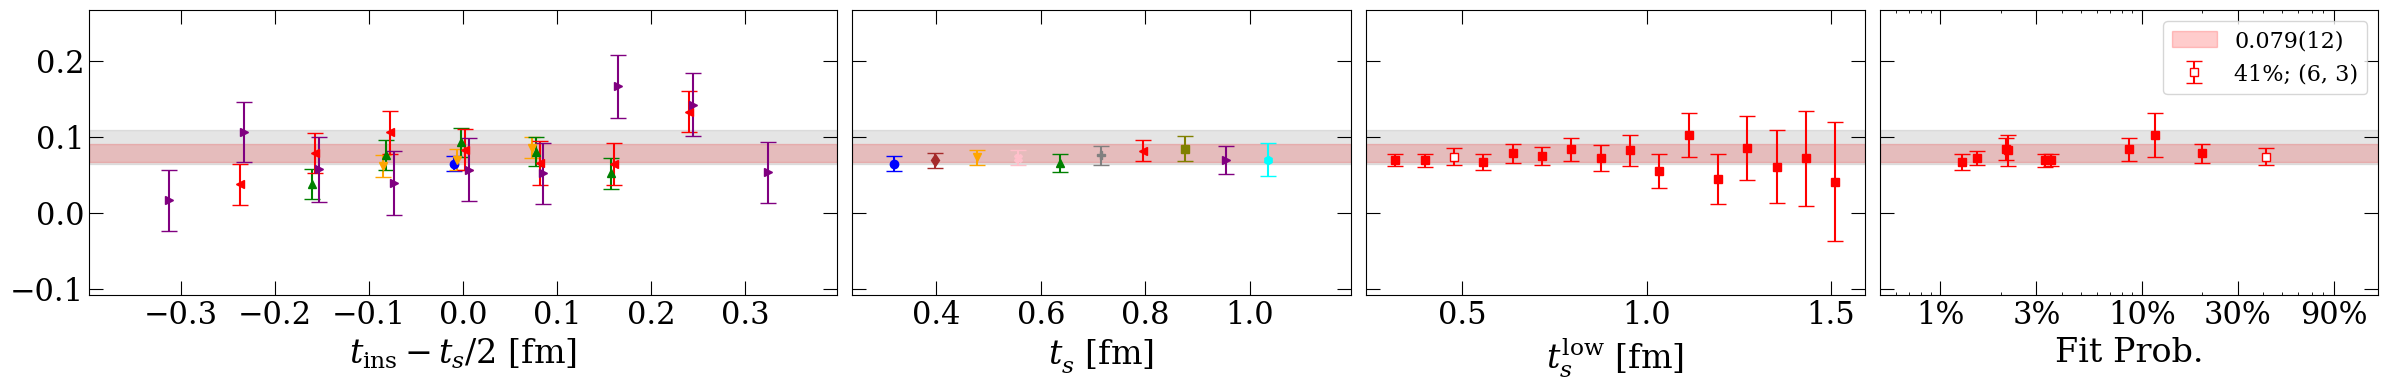

In [197]:
ens='b'; j='j+;disc'
tf2ratio=key2tf2ratio[(ens,j)]; tfmins=range(3,20); tcmins=range(2,5)
fits=yu.doFit_3pt_1st(tf2ratio,tfmins,tcmins,downSampling=[2,2],symmetrizeQ=True,label='test')
list_tf2ratio_fits=[(tf2ratio,fits)]
fig,axs,pars_jk_quotes=yu.makePlot_3pt_ChristosStyle(list_tf2ratio_fits,xunit=yu.ens2a[ens],tcmin_rainbow=2)

for icol in range(4):
    ax=axs[0,icol]
    mean,err=yu.jackme(ens2bare_CK[ens][j]*rescale[ens])
    plt_x=ax.get_xlim(); plt_y=mean; plt_yerr=err
    ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color='grey',alpha=0.2) 

yu.finalizePlot()

In [ ]:
tfmins=[6,7,8,9,10]; tcmins=[2,3,4]
fits_sum=yu.doFit_3pt_sum(tf2ratio,tfmins,tcmins,downSampling=1,corrQ=True)

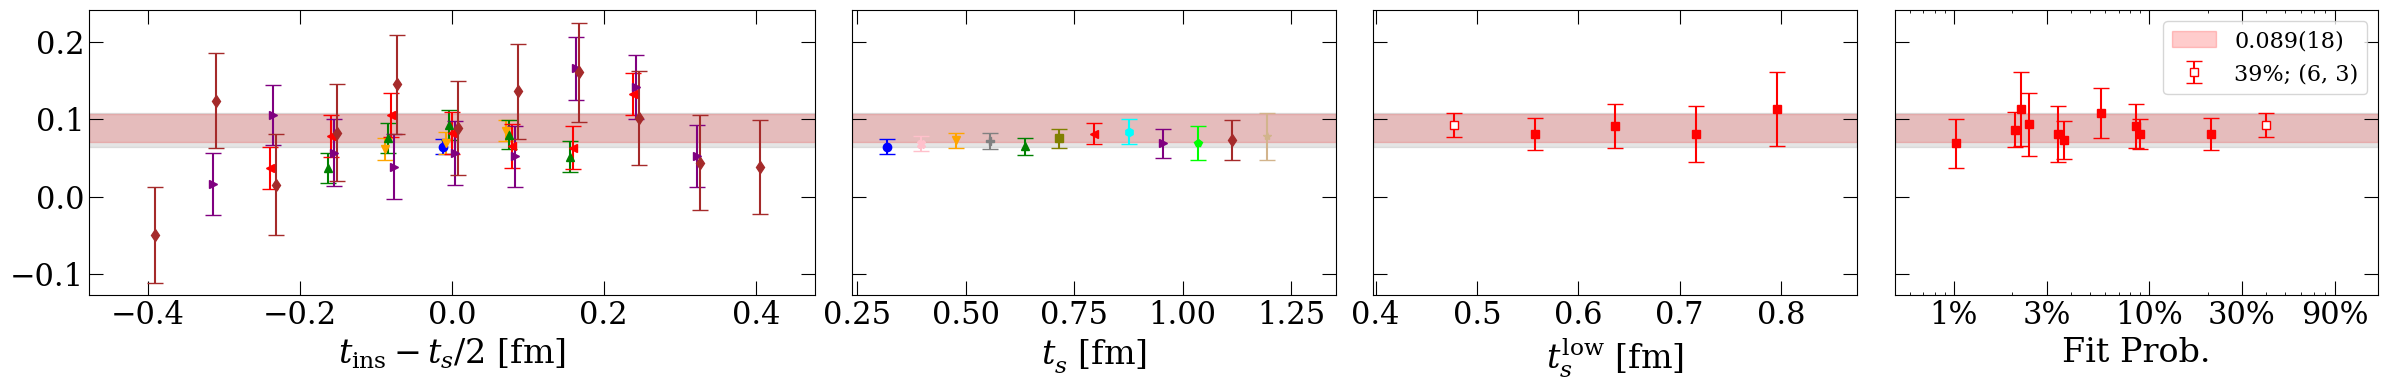

In [199]:
list_tf2ratio_fits=[(tf2ratio,fits_sum)]
fig,axs,pars_jk_quotes=yu.makePlot_3pt_ChristosStyle(list_tf2ratio_fits,xunit=yu.ens2a[ens],tcmin_rainbow=2)
for icol in range(4):
    ax=axs[0,icol]
    mean,err=yu.jackme(ens2bare_CK[ens][j]*rescale[ens])
    plt_x=ax.get_xlim(); plt_y=mean; plt_yerr=err
    ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color='grey',alpha=0.2) 
yu.finalizePlot()